In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

--------------------------------------------------------------------------------------

### Dataset "homicidios"

In [2]:
hechos = pd.read_excel('datasets/homicidios.xlsx', sheet_name='HECHOS')
hechos.head(3) 

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


In [3]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

* Tal como vimos en el EDA se eliminaran las columnas "Cruce" y "Altura"

In [4]:
hechos.drop(['Altura', 'Cruce'], axis=1 , inplace=True)
hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [5]:
hechos.shape

(696, 19)

In [6]:
hechos['FECHA'].head(5)

0   2016-01-01
1   2016-01-02
2   2016-01-03
3   2016-01-10
4   2016-01-21
Name: FECHA, dtype: datetime64[ns]

In [7]:
hechos.isnull().sum()

ID                       0
N_VICTIMAS               0
FECHA                    0
AAAA                     0
MM                       0
DD                       0
HORA                     0
HH                       0
LUGAR_DEL_HECHO          0
TIPO_DE_CALLE            0
Calle                    1
Dirección Normalizada    8
COMUNA                   0
XY (CABA)                0
pos x                    0
pos y                    0
PARTICIPANTES            0
VICTIMA                  0
ACUSADO                  0
dtype: int64

El dataframe cuanta con 696 filas y 19 columnas de las cuales voy a borrar las que no utilizare

In [8]:
hechos.drop(['AAAA', 'MM','DD','HH','XY (CABA)'], axis=1 , inplace=True)
hechos.head()

,ID,N_VICTIMAS,FECHA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,04:00:00,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,01:15:00,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,07:00:00,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,ENTRE RIOS AV. 2034,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,00:00:00,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,05:20:00,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [9]:
hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'HORA', 'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE',
       'Calle', 'Dirección Normalizada', 'COMUNA', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [10]:
# Definir un diccionario con los nuevos nombres de las columnas
nuevos_nombres = {
    'ID': 'id',
    'N_VICTIMAS': 'n_victimas',
    'FECHA': 'fecha',
    'HORA': 'hora',
    'LUGAR_DEL_HECHO': 'lugar_del_hecho',
    'TIPO_DE_CALLE': 'tipo_de_calle',
    'Calle': 'calle',
    'Dirección Normalizada': 'direccion_normalizada',
    'COMUNA': 'comuna',
    'pos x': 'longitud',
    'pos y': 'latitud',
    'PARTICIPANTES': 'participantes',
    'VICTIMA': 'victima',
    'ACUSADO': 'acusado'
}

# Renombrar las columnas del DataFrame
hechos = hechos.rename(columns=nuevos_nombres)
hechos.columns

Index(['id', 'n_victimas', 'fecha', 'hora', 'lugar_del_hecho', 'tipo_de_calle',
       'calle', 'direccion_normalizada', 'comuna', 'longitud', 'latitud',
       'participantes', 'victima', 'acusado'],
      dtype='object')

In [11]:
#hechos.to_csv('datasets/hechos.csv')

--------------------------------------------------------------------------

### Dataset "victimas"

In [12]:
victimas = pd.read_excel('datasets/homicidios.xlsx', sheet_name='VICTIMAS')
victimas.head(5)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


* Procedo a eliminar las columnas que no voy a utilizar 

In [13]:
victimas.drop(['AAAA', 'MM','DD', 'FECHA','VICTIMA'], axis=1 , inplace=True)
victimas.head()

,ID_hecho,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00


In [14]:
victimas.isnull().sum()

ID_hecho               0
ROL                    0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

In [15]:
victimas.shape

(717, 5)

In [16]:
#victimas.to_csv('datasets/victimas.csv')

-------------------------------------------------------------------------------------------------------

In [17]:
lesiones = pd.read_excel('datasets/lesiones.xlsx', sheet_name='VICTIMAS')
lesiones.head(5)

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,sd,Varon,57,SD
1,LC-2019-0000063,2019,1,1,2019-01-01,sd,SD,SD,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,sd,Varon,SD,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,sd,Varon,45,SD
4,LC-2019-0000082,2019,1,1,2019-01-01,sd,Mujer,45,SD


In [18]:
lesiones.shape

(27605, 9)

-------------------------------------------------------------------------------------------------------

### Controlamos las columnas 'latitud' y 'longitud'

In [19]:
hechos.head(1)

,id,n_victimas,fecha,hora,lugar_del_hecho,tipo_de_calle,calle,direccion_normalizada,comuna,longitud,latitud,participantes,victima,acusado
0,2016-0001,1,2016-01-01,04:00:00,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO


In [20]:
# Se verifican columnas de longitud y latitud con solo '.' en sus registros
latitud_longitud = hechos[(hechos['latitud'] == '.') & (hechos['longitud'] == '.')]
latitud_longitud.head(12)

,id,n_victimas,fecha,hora,lugar_del_hecho,tipo_de_calle,calle,direccion_normalizada,comuna,longitud,latitud,participantes,victima,acusado
38,2016-0052,1,2016-04-20,20:00:00,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,13,.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,00:00:00,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NaN,4,.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,20:35:00,SD,CALLE,NaN,NaN,0,.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,00:00:00,AUTOPISTA 25 DE MAYO,AUTOPISTA,AUTOPISTA 25 DE MAYO,AUTOPISTA 25 DE MAYO,0,.,.,SD-SD,SD,SD
176,2017-0042,1,2017-04-10,09:00:00,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,"LUGONES, LEOPOLDO AV.","LUGONES, LEOPOLDO AV.",14,.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,11:08:08,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,AUTOPISTA PERITO MORENO,NaN,9,.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,03:47:47,AU DELLEPIANE 2400,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NaN,7,.,.,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,2017-11-19,23:22:17,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,.,.,MOTO-PASAJEROS,MOTO,PASAJEROS
313,2018-0039,1,2018-04-21,22:15:00,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,14,.,.,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,06:40:00,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,14,.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO


In [21]:
def reemplazar_punto(fila):
    if fila == '.':
        return None
    else:
        return float(fila)

In [22]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     696 non-null    object        
 1   n_victimas             696 non-null    int64         
 2   fecha                  696 non-null    datetime64[ns]
 3   hora                   696 non-null    object        
 4   lugar_del_hecho        696 non-null    object        
 5   tipo_de_calle          696 non-null    object        
 6   calle                  695 non-null    object        
 7   direccion_normalizada  688 non-null    object        
 8   comuna                 696 non-null    int64         
 9   longitud               696 non-null    object        
 10  latitud                696 non-null    object        
 11  participantes          696 non-null    object        
 12  victima                696 non-null    object        
 13  acusa

In [23]:
hechos['latitud'] = hechos['latitud'].apply(reemplazar_punto)
hechos['longitud'] = hechos['longitud'].apply(reemplazar_punto)

In [24]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     696 non-null    object        
 1   n_victimas             696 non-null    int64         
 2   fecha                  696 non-null    datetime64[ns]
 3   hora                   696 non-null    object        
 4   lugar_del_hecho        696 non-null    object        
 5   tipo_de_calle          696 non-null    object        
 6   calle                  695 non-null    object        
 7   direccion_normalizada  688 non-null    object        
 8   comuna                 696 non-null    int64         
 9   longitud               684 non-null    float64       
 10  latitud                684 non-null    float64       
 11  participantes          696 non-null    object        
 12  victima                696 non-null    object        
 13  acusa

In [25]:
latitud_longitud2 = hechos[(hechos['latitud'] == '.') & (hechos['longitud'] == '.')]
latitud_longitud2.head(12)

,id,n_victimas,fecha,hora,lugar_del_hecho,tipo_de_calle,calle,direccion_normalizada,comuna,longitud,latitud,participantes,victima,acusado


-------------------------------

In [26]:
victimas[victimas['EDAD'] == "SD"]

,ID_hecho,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
30,2016-0041,PASAJERO_ACOMPAÑANTE,MASCULINO,SD,2016-03-30 00:00:00
33,2016-0045,CONDUCTOR,MASCULINO,SD,SD
35,2016-0048,PEATON,FEMENINO,SD,SD
36,2016-0049,SD,SD,SD,SD
39,2016-0052,SD,SD,SD,SD
55,2016-0077,PEATON,FEMENINO,SD,SD
63,2016-0085,SD,MASCULINO,SD,SD
72,2016-0096,CONDUCTOR,MASCULINO,SD,SD
89,2016-0115,SD,MASCULINO,SD,SD
93,2016-0119,PASAJERO_ACOMPAÑANTE,FEMENINO,SD,SD


In [27]:
victimas.head()

,ID_hecho,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00


In [28]:
victimas['EDAD'] = pd.to_numeric(victimas['EDAD'], errors='coerce')

In [29]:
victimas['EDAD'].replace(np.nan, round(np.mean(victimas['EDAD']),0), inplace=True)

In [30]:
#hechos.to_csv('datasets/hechos.csv')
#victimas.to_csv('datasets/victimas.csv')

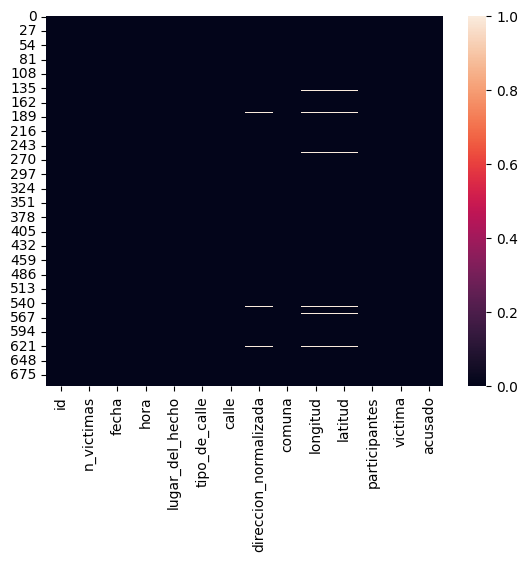

In [32]:
# Revisamos si dentro del df de hechos hay valores nulos
sns.heatmap(hechos.isnull())
plt.show()

In [33]:
hechos.isnull().sum()

id                        0
n_victimas                0
fecha                     0
hora                      0
lugar_del_hecho           0
tipo_de_calle             0
calle                     1
direccion_normalizada     8
comuna                    0
longitud                 12
latitud                  12
participantes             0
victima                   0
acusado                   0
dtype: int64

In [35]:
victimas['EDAD'].head(5)

0    19.0
1    70.0
2    30.0
3    18.0
4    29.0
Name: EDAD, dtype: float64